# LOADIN THE DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv("Data/test.csv")

## EDA

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.describe()
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
print(df_train.info())
print(" \n missing values overview \n \n")
print(df_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
 
 missing values overview 
 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

<AxesSubplot:>

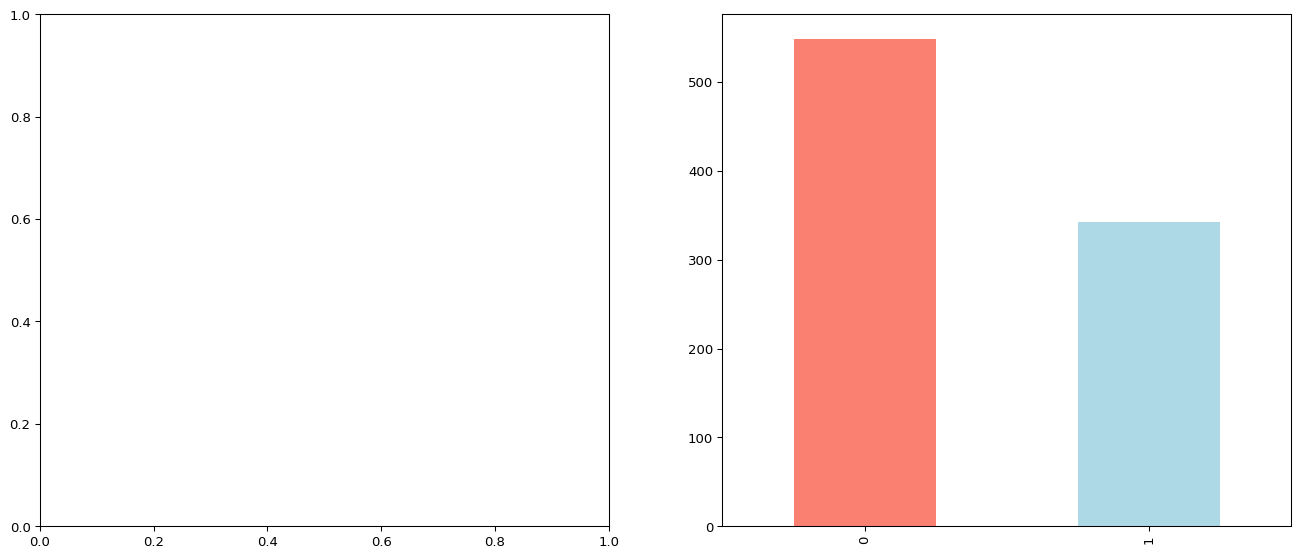

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, dpi=95, figsize=(17, 7))

df_train.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
# df_train.Cabin.value_counts().plot(kind ="bar", color= ["salmon", "lightblue"])
# df_train.Ticket.value_counts().plot(kind ="bar", color= ["salmon", "lightblue"])


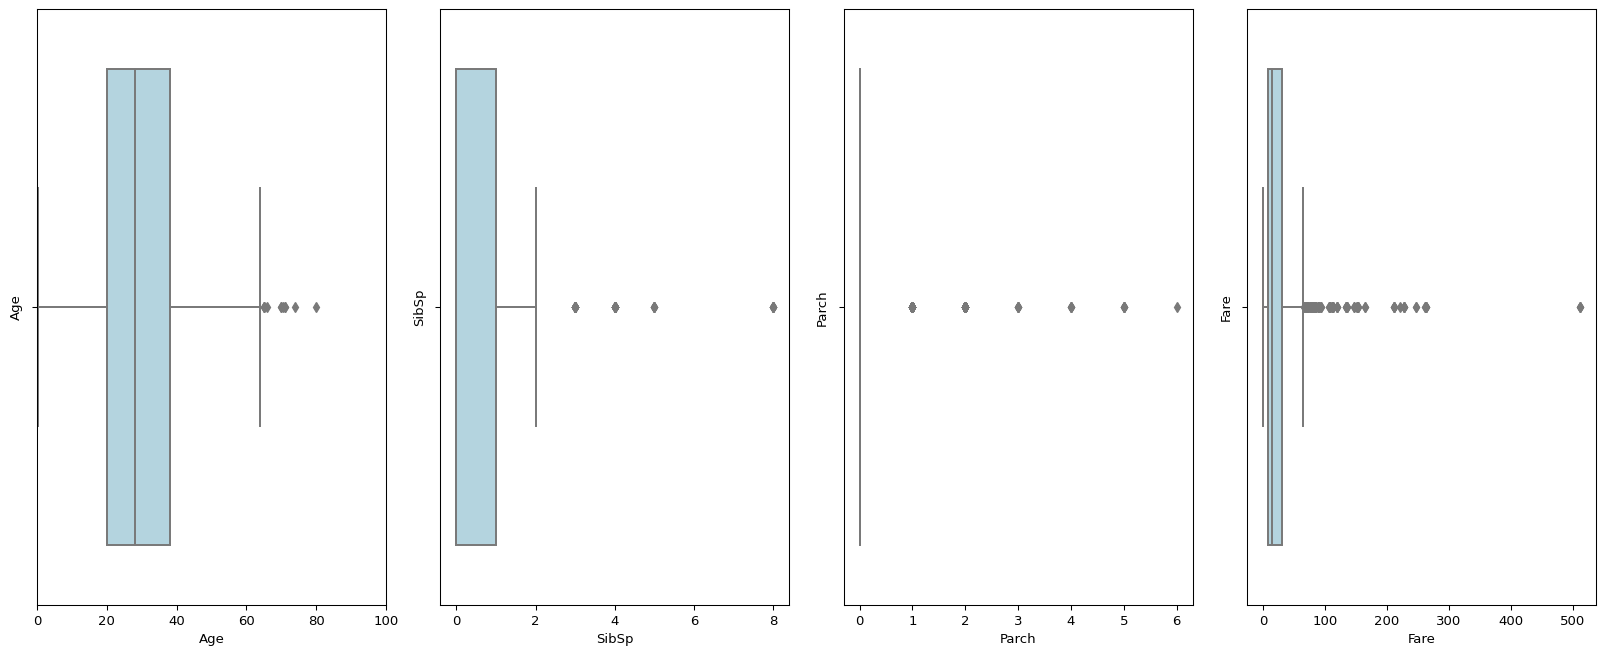

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ["Age", "SibSp", "Parch", "Fare"]

# Create subplots
fig, axs = plt.subplots(1, 4, dpi=95, figsize=(17, 7))

# Plot each boxplot in a separate subplot
for i, var in enumerate(numerical_columns):  
    sns.boxplot(x=var, data=df_train, color='lightblue', ax=axs[i])
    axs[i].set_ylabel(var)
    if var == 'Age':
        axs[i].set_xlim(0,100)

plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

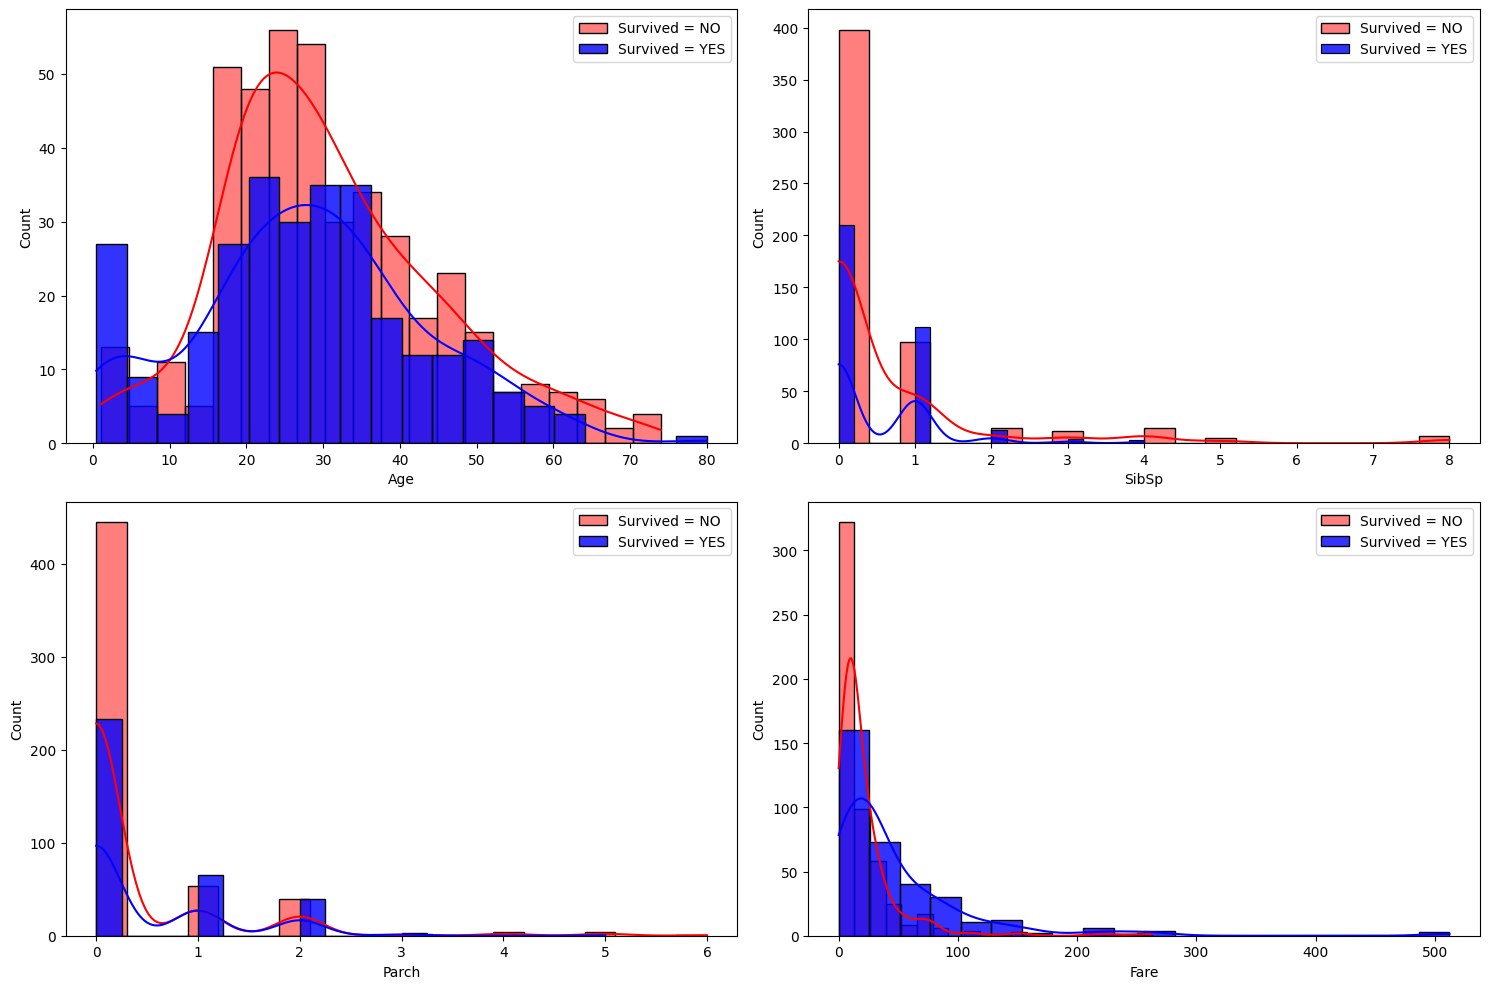

In [8]:


plt.figure(figsize=(15, 15))
numerical_columns = ["Age", "SibSp", "Parch", "Fare"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, variable in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    # Plot the histogram for Survived = 0 (grey color)
    sns.histplot(df_train[df_train["Survived"] == 0][variable], bins=20, color='red', alpha=0.5, kde=True, label='Survived = NO')
    # Plot the histogram for Survived = 1 (red color)
    sns.histplot(df_train[df_train["Survived"] == 1][variable], bins=20, color='blue', alpha=0.8, kde=True, label='Survived = YES')
    plt.legend()
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

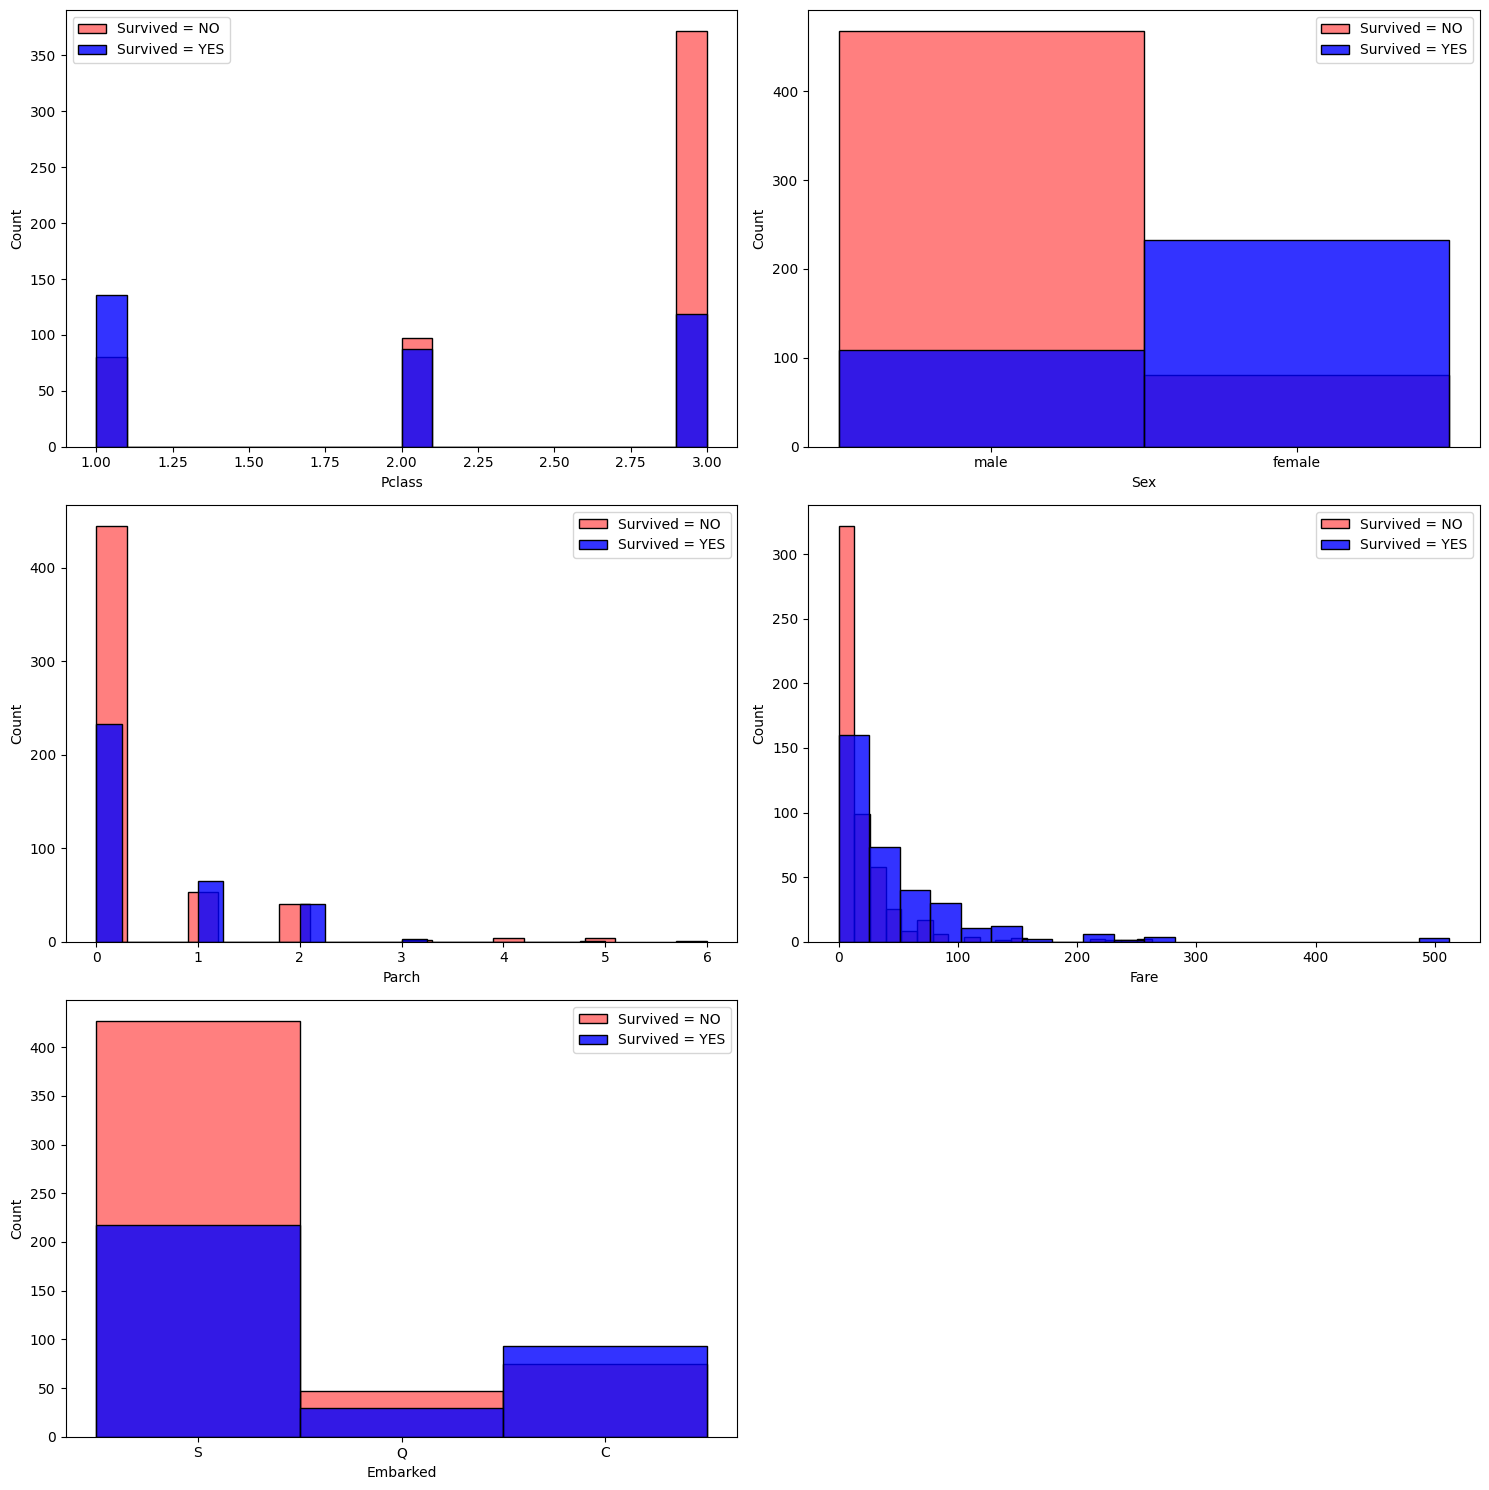

In [9]:
categorical_columns = ["Pclass", "Sex", "Parch", "Fare", "Embarked" ] # cabin is difficult categorical_columns = ["pclass", "sex", "Parch", "Ticket", "Fare", "Cabin", "Embarked" ] # cabin is difficult
plt.figure(figsize=(15, 15))

for i, variable in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    
    # Plot the histogram for Survived = 0 (grey color)
    sns.histplot(df_train[df_train["Survived"] == 0][variable], bins=20, color='red', alpha=0.5,  label='Survived = NO')
    
    # Plot the histogram for Survived = 1 (red color)
    sns.histplot(df_train[df_train["Survived"] == 1][variable], bins=20, color='blue', alpha=0.8,  label='Survived = YES')
    
    plt.legend()
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

(7.5, -0.5)

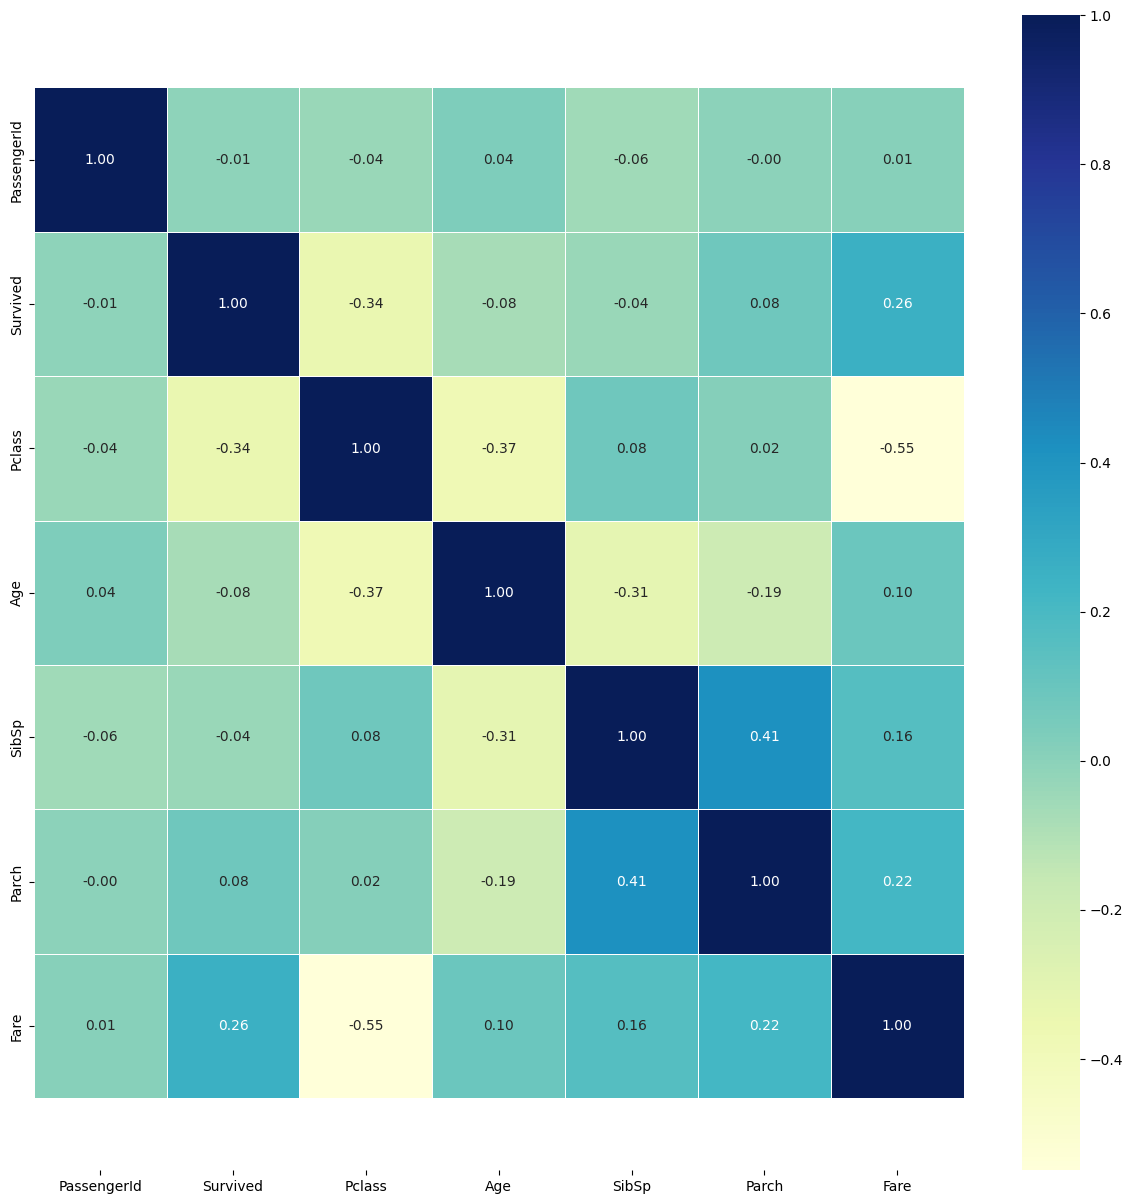

In [10]:
corr_matrix = df_train.corr()

fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with survival'}>

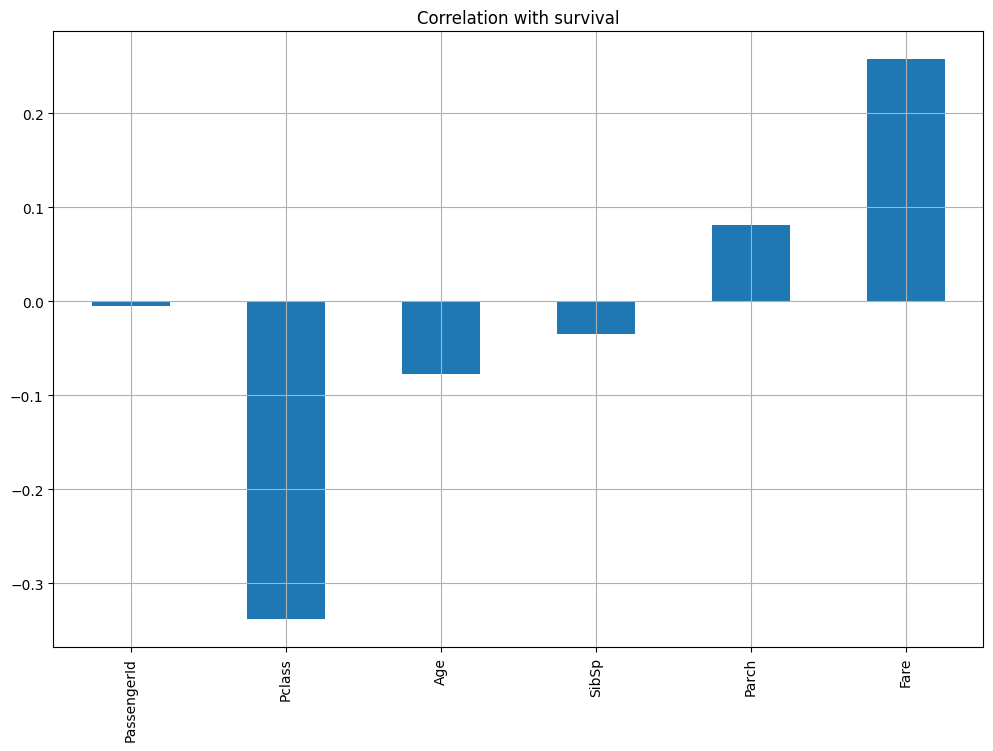

In [11]:
df_train.drop('Survived', axis=1).corrwith(df_train.Survived).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with survival")

## takeaways from EDA


missingness in the values of Age and Cabin, important to adress. choose to impute age and group cabin based on model
outliers seem to be non-present

I don't see a particular class imbalance in the target variable in the train data 

we see a number of correlations worth looking at, in the categorical domain we have the dovisl status gender and


number of children on board, which is interesting, also price class in an interesting predictor 




# Data preprocessing 

In [12]:
# we impute age with the average 
average_age = df_train['Age'].mean()
df_train['Age'].fillna(average_age, inplace=True)

In [13]:
# display and group the cabins in only a few categories
print(df_train['Cabin'].str[0].unique())
df_train['Cabin'] = df_train['Cabin'].str[0]


[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [17]:
# we remove columns we believe have no value
columns_to_drop = ["Ticket",  "Name"]
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


# Scaling and Feature engineering 

In [19]:
# since the model we are about the choose can handle skewed data pretty fine, I dont see a particular need for scaling
# however we can set up a pipeline per practice on how to do it
# transit to more object oriented lay-out

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [48]:
class DataHandler:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.trained_scaler = None

    def preprocess(self, preprocessing_method='standard_scaling'):
        """boilerplate for various preprocessing methods"""
        
        if preprocessing_method == 'standard_scaling':
            self.fit_and_transform_scaler()
            
        else: 
            print("this method is not implemented yet")

    def fit_and_transform_standard_scaler(self):
        """fit and transforms only numerical columns"""
        
        scaler = StandardScaler()
        numerical_columns = self.X.select_dtypes(include=[np.float64, np.int64]).columns
        
        if len(numerical_columns) > 0:
            scaler = StandardScaler()
            self.trained_scaler = scaler.fit(self.X[numerical_columns])
            self.X[numerical_columns] = self.trained_scaler.transform(self.X[numerical_columns])
            
        else:
            print("No numerical columns to scale.")
        
    def transform_standard_scaler(self):
        """transform data with trained scalar"""
        
        if self.trained_scalar == None:
            print("cannot transform with a scalar that is not fitted")
        
        self.X = scaler.trained_scalar(self.X)

    def split_data(self, test_size=0.2, random_state=42):
        
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)

    def k_fold_cross_validation(self, n_splits=5, shuffle=True, random_state=42):
        
        kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
        for train_index, val_index in kf.split(self.X_train):
            X_train_fold, X_val_fold = self.X_train[train_index], self.X_train[val_index]
            y_train_fold, y_val_fold = self.y_train[train_index], self.y_train[val_index]
            # perform other methods
            self._standard_scaling_fold(X_train_fold, X_val_fold)



In [49]:
# seperate the target variable
X_train = df_train.drop("Survived", axis = 1)
Y_train = df_train["Survived"]

# handle the scaling by training and fitting it to the training data
data_handler = DataHandler(X_train, Y_train)
data_handler.fit_and_transform_standard_scaler()


data_handler.X.head()
data_handler.y.head()


# optionally divide in cross folds and proceed to training

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64